Initial shape: (100, 12)
   Index      Customer Id First Name Last Name  \
0      1  DD37Cf93aecA6Dc     Sheryl    Baxter   
1      2  1Ef7b82A4CAAD10    Preston    Lozano   
2      3  6F94879bDAfE5a6        Roy     Berry   
3      4  5Cef8BFA16c5e3c      Linda     Olsen   
4      5  053d585Ab6b3159     Joanna    Bender   

                           Company               City  \
0                  Rasmussen Group       East Leonard   
1                      Vega-Gentry  East Jimmychester   
2                    Murillo-Perry      Isabelborough   
3  Dominguez, Mcmillan and Donovan         Bensonview   
4         Martin, Lang and Andrade     West Priscilla   

                      Country                 Phone 1                Phone 2  \
0                       Chile            229.077.5154       397.884.0519x718   
1                    Djibouti              5153435776       686-620-1820x944   
2         Antigua and Barbuda         +1-539-402-0259    (496)978-3969x58947   
3          

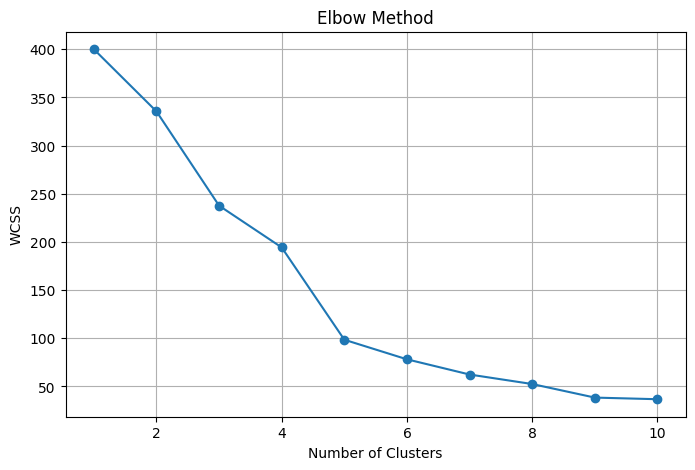

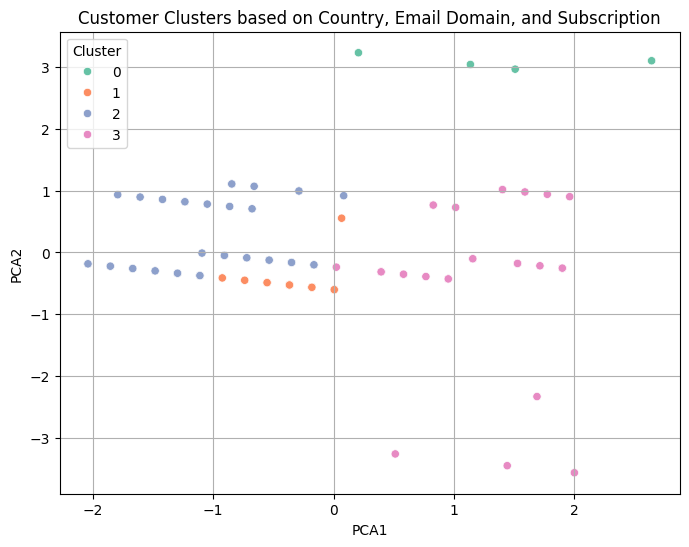

Clustered data saved as 'customer_clusters_output.csv'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Load Dataset
df = pd.read_csv("customer_data.csv")
df.columns = df.columns.str.strip()  # Clean column names
print("Initial shape:", df.shape)
print(df.head())

# Step 2: Feature Engineering (Create usable numeric features)
# Extract email domain
df['Email Domain'] = df['Email'].str.split('@').str[-1].str.lower()

# Convert Subscription Date to year/month
df['Subscription Date'] = pd.to_datetime(df['Subscription Date'], errors='coerce')
df['Sub_Year'] = df['Subscription Date'].dt.year
df['Sub_Month'] = df['Subscription Date'].dt.month

# Encode Country and Email Domain using frequency encoding
df['Country_freq'] = df['Country'].map(df['Country'].value_counts())
df['EmailDomain_freq'] = df['Email Domain'].map(df['Email Domain'].value_counts())

# Step 3: Select Features for Clustering
features = ['Country_freq', 'EmailDomain_freq', 'Sub_Year', 'Sub_Month']
df_clean = df[features].dropna()

# Step 4: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Step 5: Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# Step 6: Apply KMeans
optimal_clusters = 4  # Assume elbow method suggests 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 7: PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_clean['PCA1'] = X_pca[:, 0]
df_clean['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Customer Clusters based on Country, Email Domain, and Subscription")
plt.grid(True)
plt.show()

# Step 8: Save results
df_clean.to_csv("customer_clusters_output.csv", index=False)
print("Clustered data saved as 'customer_clusters_output.csv'")

